# Introduction


Hi~ this is my first notebook for data visualization. In this notebook I will do some basic data analyses and visualization by creating plots using matplotlib and seaborn, the goal of writing this notebook is to familiarize myself with the usage of tools such as pandas,matplotlib.
I will be very happy if anyone finds this notebook helpful😉



In [22]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [23]:
label_color = '#353535'
color_mint = sns.cubehelix_palette(rot=-.4)
color_warm = sns.cubehelix_palette()
color_mix = ['#ef476f','#ffd166','#06d6a0','#118ab2','#073b4c']

mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.left'] = False
mpl.rcParams['axes.labelcolor'] = label_color



mpl.rcParams["font.family"] = 'monospace'

#  Industry and GDP


💭 In this section I would like to find out something about a country's GDP, since this index is very important when it comes to the measurement of economic development. Firstly, I am curious about what makes up China's GDP, and to what extent it has changed over the years.

In [24]:
economy_data = pd.read_csv('./BRICS Development Indicators/Economy_Data.csv', sep=';')
economy_data.head()

,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
0,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,Brazil,BRA,1970.0,NaN
1,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,China,CHN,1970.0,NaN
2,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,India,IND,1970.0,NaN
3,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,Russian Federation,RUS,1970.0,NaN
4,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,South Africa,ZAF,1970.0,NaN


In [25]:
#data cleaning and preparation
economy_data.dropna(subset=["Value"], inplace=True)
economy_labels = ['Agriculture, forestry, and fishing, value added (% of GDP)', 
                 'Industry (including construction), value added (% of GDP)',
                 'Services, value added (% of GDP)',
                 'GDP (constant 2010 US$)',
                 'GDP growth (annual %)',
                 'GDP per capita (constant 2010 US$)']
economy = economy_data[economy_data['SeriesName'].isin(economy_labels)]
economy.loc[:,'Year'] = pd.to_datetime(economy['Year'],format='%Y').dt.year
economy = economy.set_index(['Year','SeriesName','CountryName'])['Value'].unstack().unstack()
# economy.pivot('Year',columns=['SeriesName','CountryName'],values='Value')
economy.isnull().sum()

CountryName         SeriesName                                                
Brazil              Agriculture, forestry, and fishing, value added (% of GDP)     0
                    GDP (constant 2010 US$)                                        0
                    GDP growth (annual %)                                          0
                    GDP per capita (constant 2010 US$)                             0
                    Industry (including construction), value added (% of GDP)      0
                    Services, value added (% of GDP)                               0
China               Agriculture, forestry, and fishing, value added (% of GDP)     0
                    GDP (constant 2010 US$)                                        0
                    GDP growth (annual %)                                          0
                    GDP per capita (constant 2010 US$)                             0
                    Industry (including construction), value added (% o

In [26]:
economy.sort_values(by='Year',ascending=False,inplace=True)
economy.fillna(method='ffill',inplace=True)
economy.tail(10)

CountryName                                                     Brazil  \
SeriesName  Agriculture, forestry, and fishing, value added (% of GDP)   
Year                                                                     
1979                                                  9.899895           
1978                                                 10.276602           
1977                                                 12.930838           
1976                                                 11.454689           
1975                                                 10.682677           
1974                                                 11.229005           
1973                                                 11.445859           
1972                                                 11.068956           
1971                                                 11.014181           
1970                                                 10.373620           

CountryName                                                \
SeriesName  GDP (constant 2010 US$) GDP growth (annual %)   
Year                                                        
1979                   9.235856e+11              6.766285   
1978                   8.650536e+11              3.231710   
1977                   8.379728e+11              4.606318   
1976                   8.010728e+11              9.790410   
1975                   7.296383e+11              5.209076   
1974                   6.935127e+11              9.042120   
1973                   6.360044e+11             13.978692   
1972                   5.580029e+11             12.052802   
1971                   4.979821e+11             11.295087   
1970                   4.474430e+11              8.769947   

CountryName                                     \
SeriesName  GDP per capita (constant 2010 US$)   
Year                                             
1979                               7835.070313   
1978                               7514.289263   
1977                               7453.590172   
1976                               7296.347484   
1975                               6805.298288   
1974                               6623.415508   
1973                               6219.514016   
1972                               5587.886256   
1971                               5108.403386   
1970                               4704.317561   

CountryName                                                            \
SeriesName  Industry (including construction), value added (% of GDP)   
Year                                                                    
1979                                                 36.519590          
1978                                                 35.520614          
1977                                                 34.051602          
1976                                                 34.979841          
1975                                                 35.471276          
1974                                                 34.818587          
1973                                                 33.422088          
1972                                                 32.741138          
1971                                                 32.722139          
1970                                                 32.183694          

CountryName                                   \
SeriesName  Services, value added (% of GDP)   
Year                                           
1979                               43.448104   
1978                               42.708021   
1977                               41.132382   
1976                               41.648657   
1975                               42.140691   
1974                               40.862632   
1973                               40.820765   
1972                               41.370567   
1971                               41.915429   
1970                               41.471836   

CountryName      

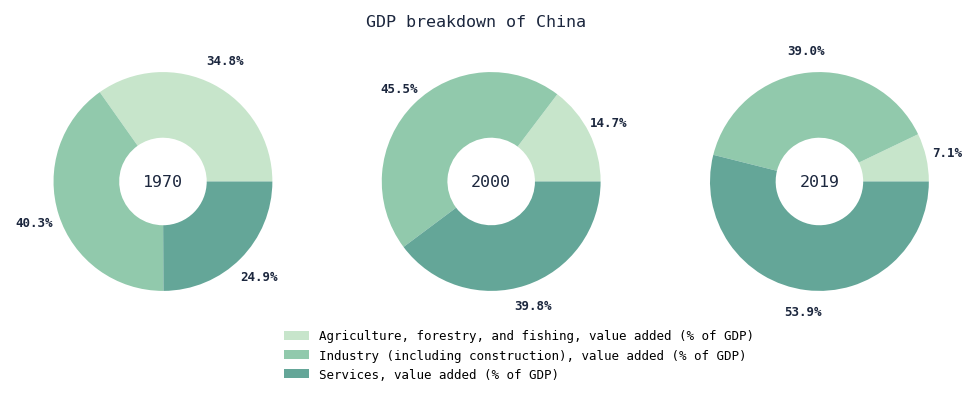

In [27]:
fig, ax = plt.subplots(1,3,figsize=(8,6),dpi=150)
#equivalent to this
# fig = plt.figure(figsize=(6,6),dpi=150)
# ax = fig.add_subplot(1,1,1)

ax[0].pie(economy['China'].loc[1970,economy_labels[:3]],
        colors=color_mint,
        autopct='%1.1f%%',
        wedgeprops=dict(width=0.6),
        pctdistance= 1.24,
        textprops={
           'fontsize': 6,
           'color': color_mint[-1],
           'fontweight': 'bold'
       })

ax[1].pie(economy['China'].loc[2000,economy_labels[:3]],
        colors=color_mint,
        autopct='%1.1f%%',
        wedgeprops=dict(width=0.6),
        pctdistance= 1.2,
        textprops={
           'fontsize': 6,
           'color': color_mint[-1],
           'fontweight': 'bold'
       })

ax[2].pie(economy['China'].loc[2019,economy_labels[:3]],
        colors=color_mint,
        autopct='%1.1f%%',
        wedgeprops=dict(width=0.6),
        pctdistance= 1.2,
        textprops={
           'fontsize': 6,
           'color': color_mint[-1],
           'fontweight': 'bold'
       })
ax[0].legend(economy_labels[:3], loc='upper center', bbox_to_anchor=(1.8,0), ncol=1, frameon=False, fontsize=6)

ax[0].text(0, 0, "1970", ha='center', va='center', fontsize = 8, color = color_mint[-1])
ax[1].text(0, 0, "2000", ha='center', va='center', fontsize = 8, color = color_mint[-1])
ax[2].text(0, 0, "2019", ha='center', va='center', fontsize = 8, color = color_mint[-1])

plt.suptitle('GDP breakdown of China',color=color_mint[-1],fontsize=8, va='center', ha='center', x=0.5, y=0.68)

ax[0].set_aspect('equal')
ax[1].set_aspect('equal')

plt.show()

💭 So it's easy to see that Agriculture, industry and services are three main parts, and services part is growing bigger and bigger. And what about four other countries?

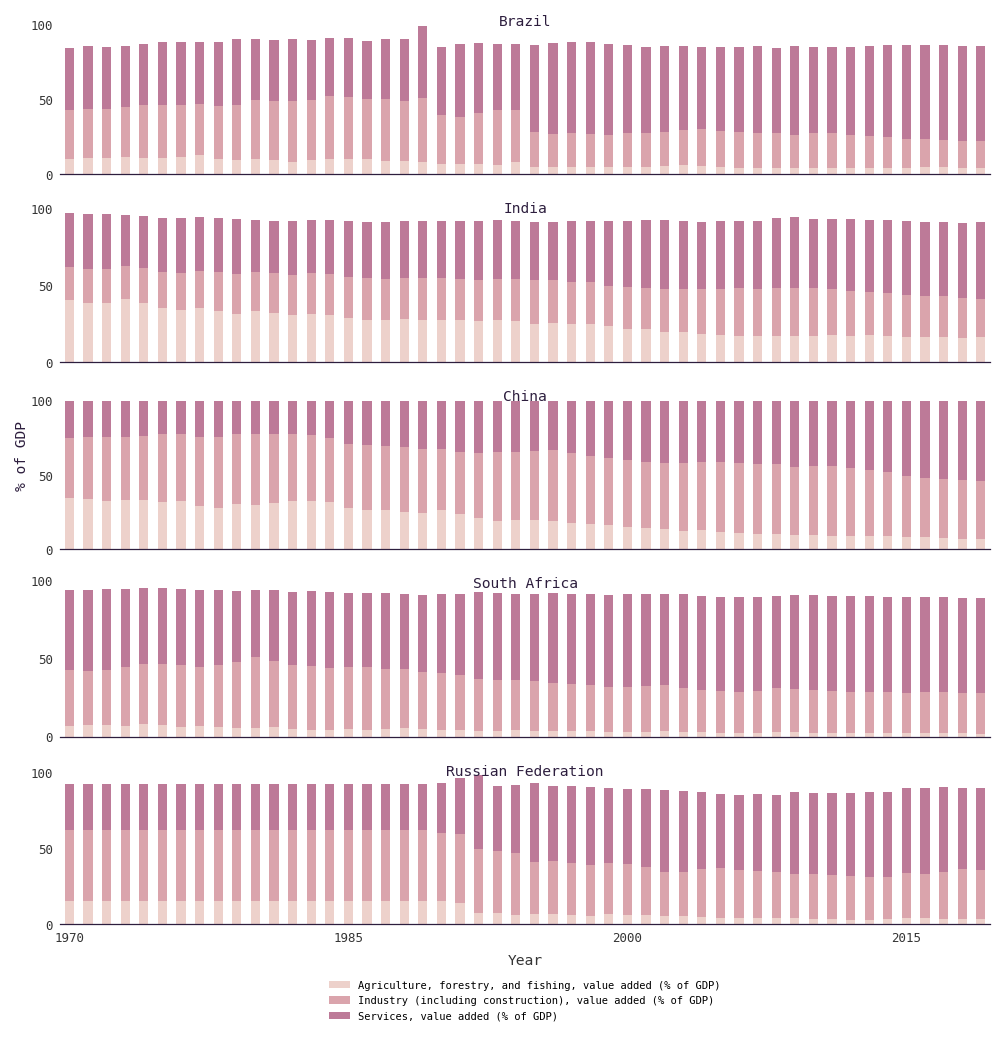

In [28]:
# countries = list(economy.columns)
# countries = set(list(zip(*countries))[0])
countries = list(economy_data['CountryName'].unique())

fig, ax = plt.subplots(5,1,figsize=(8,8),dpi=150,sharex=True)
for i in range(5):
    economy[countries[i]][economy_labels[:3]].sort_values(by='Year').plot(kind='bar', ax=ax[i], stacked=True,legend=False,color=color_warm)
    ax[i].set_yticks(np.linspace(0,100,3))
    ax[i].xaxis.set_major_locator(plt.MaxNLocator(4))
    ax[i].tick_params(axis='both',which='both',length=0,labelsize=6,labelcolor=label_color)
    ax[i].tick_params(axis='x',which='both',labelrotation=0)
    for s in ['top','right','left']:
        ax[i].spines[s].set_visible(False)
    s = ax[i].spines['bottom']
    s.set_edgecolor(color_warm[-1])
    s.set_linewidth(0.6)
    
    ax[i].set_title(countries[i],ha='center',va='center',x=0.5,y=0.9,color=color_warm[-1],fontsize=7)

plt.legend(economy_labels[:3],loc='upper center', bbox_to_anchor=(0.5,-0.3), ncol=1, frameon=False, fontsize=5)
plt.ylabel('% of GDP',x=0,y=3,ha='center',va='center',color=color_warm[-1],fontsize=7)
plt.xlabel('Year',fontsize=7)
plt.show()

💭 It seems all countries have growing proportion of services in common.

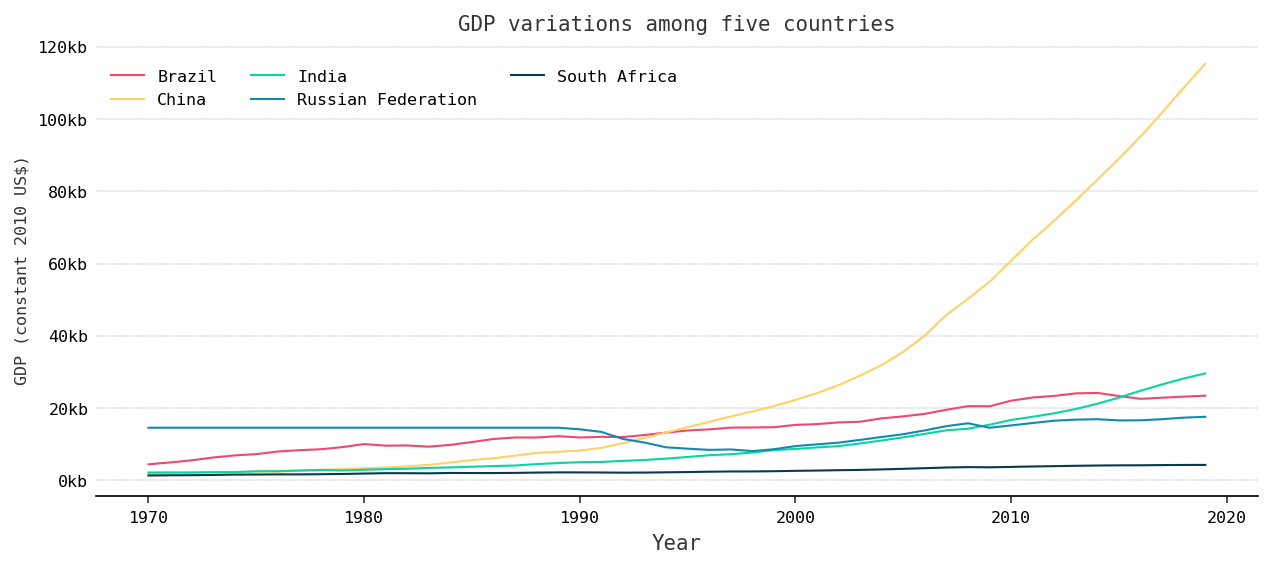

In [29]:
def y_update_ticklabel_gdp(x,pos):
    result = x/100000000000
    return '{}kb'.format(int(result))

df = economy.stack().reset_index()
df = df[df['SeriesName'] == 'GDP (constant 2010 US$)'].sort_values(by='Year')

fig, ax = plt.subplots(1,1,figsize=(10,4),dpi=150)
df.plot(x='Year',ax=ax,kind='line',color=color_mix,linewidth=1)
# ax.set_yscale(value='log')
ax.tick_params(axis='y',which='both',length=0)
ax.tick_params(axis='both',color=label_color,labelsize=8)
ax.yaxis.set_major_formatter(FuncFormatter(y_update_ticklabel_gdp))
ax.legend(loc='center left', bbox_to_anchor=(0,0.9), ncol=3,frameon=False, fontsize=8)
ax.set_ylabel('GDP (constant 2010 US$)',color=label_color,fontsize=8)
ax.set_title('GDP variations among five countries',color=label_color,fontsize=10)
ax.grid(axis='y',color='grey', linestyle='--', linewidth=0.2)
plt.show()

💭 China'GDP is ahead of all so far.

# Urbanization and CO2 Variation

In [30]:
data = pd.read_csv('./BRICS Development Indicators/EducationAndEnviron_Data.csv', sep=';')
data.dropna(subset=["Value"],inplace=True)

population_labels = ['Rural population growth (annual %)',
                    'Rural population',
                    'Urban population growth (annual %)',
                    'Urban population',
                    'Urban population (% of total population)',
                    'Rural population (% of total population)']
population = data[data['SeriesName'].isin(population_labels)]
population.loc[:,'Year'] = pd.to_datetime(population['Year'],format='%Y').dt.year
# population_china = population[population['CountryName']=='China']
population.head()

,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
1075,Rural population,SP.RUR.TOTL,Brazil,BRA,1970,41936390.0
1076,Rural population,SP.RUR.TOTL,China,CHN,1970,675928190.0
1077,Rural population,SP.RUR.TOTL,India,IND,1970,445484289.0
1078,Rural population,SP.RUR.TOTL,Russian Federation,RUS,1970,48939317.0
1079,Rural population,SP.RUR.TOTL,South Africa,ZAF,1970,11518437.0


In [31]:
df = population.set_index(['Year','CountryName','SeriesName'])['Value'].unstack().reset_index().set_index('Year')#the order of set_index is important here
df.fillna(method='ffill',inplace=True)
df.fillna(method='bfill',inplace=True)
# df.drop('CountryName',axis=1,inplace=True)
df.head()
df_china = df[df['CountryName']=='China'].reset_index()
df_china.head()

SeriesName,Year,CountryName,Rural population,Rural population (% of total population),Rural population growth (annual %),Urban population,Urban population (% of total population),Urban population growth (annual %)
0,1970,China,675928190.0,82.600,2.916759,142386810.0,17.400,2.028736
1,1971,China,695661123.0,82.708,2.877581,145443877.0,17.292,2.124292
2,1972,China,713898765.0,82.816,2.587852,148131235.0,17.184,1.830832
3,1973,China,730387430.0,82.816,2.283395,151552570.0,17.184,2.283396
4,1974,China,744661478.0,82.708,1.935460,155688522.0,17.292,2.692480


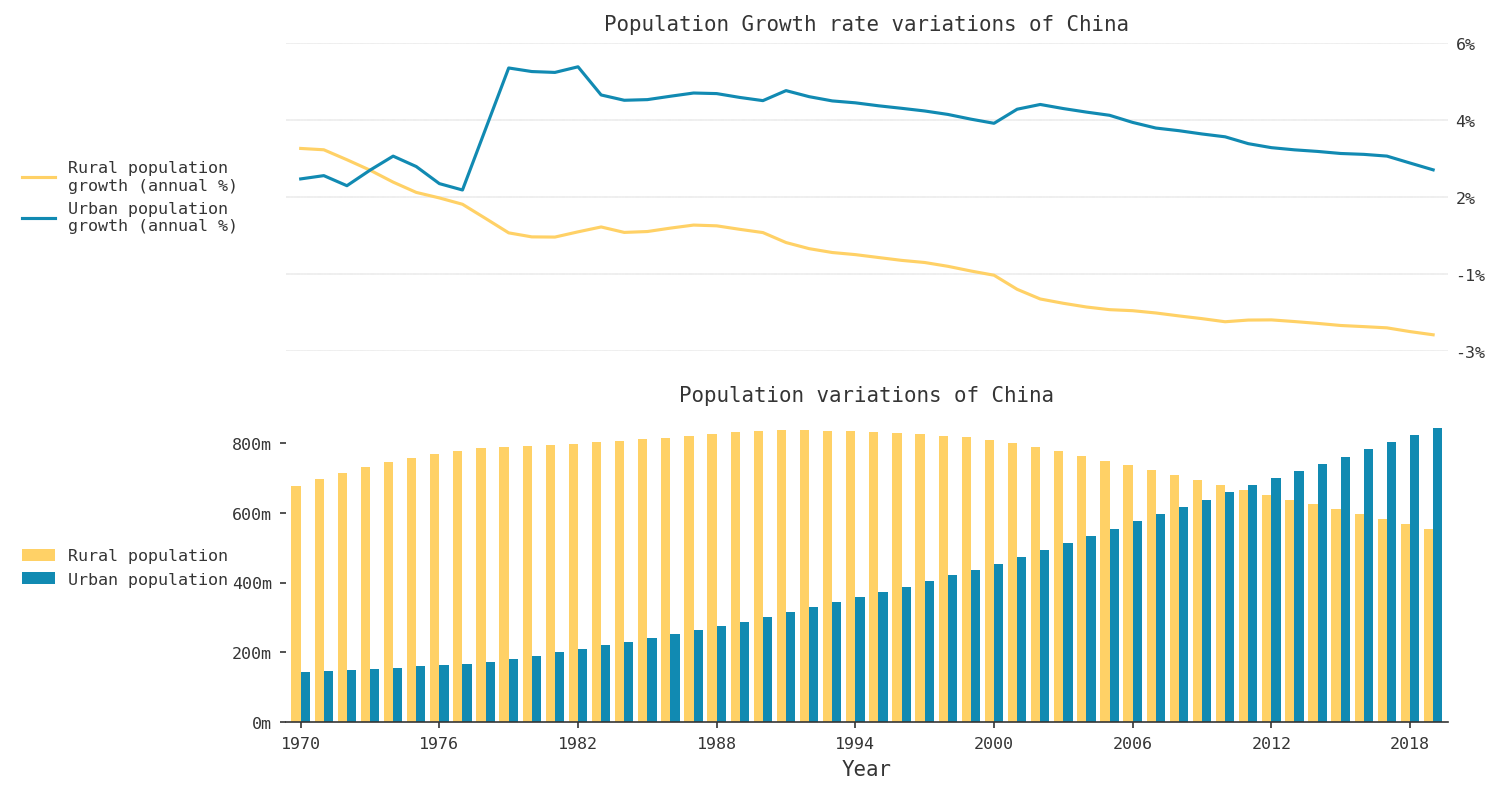

In [32]:
def y_update_ticklabel_ax1(x,pos):
    result = x/1000000
    return '{}m'.format(int(result))

def y_update_ticklabel_ax0(x,pos):
    result = round(x)
    return '{}%'.format(result)

df_china = df[df['CountryName']=='China'].reset_index()# by resetting index i fixed a problem that subplot one didnt show lines, why?


fig, ax = plt.subplots(2,1,figsize=(10,6),dpi=150,sharex=True)

df_china.plot(y=['Rural population growth (annual %)','Urban population growth (annual %)'],kind='line',ax=ax[0],color=[color_mix[1],color_mix[3]])
ax[0].yaxis.set_major_locator(plt.MaxNLocator(4))
ax[0].yaxis.set_major_formatter(FuncFormatter(y_update_ticklabel_ax0))
ax[0].set_yticks(np.linspace(-3,6,5))
ax[0].tick_params(axis='both',which='both',length=0)
ax[0].tick_params(axis='y',which='both',length=0,labelcolor=label_color,labelsize=8)
ax[0].spines['bottom'].set_visible(False)
ax[0].yaxis.set_ticks_position('right')
ax[0].grid(axis='y',which='major',color=label_color, linestyle='--', linewidth=0.1)
ax[0].legend(labels=['Rural population\ngrowth (annual %)','Urban population\ngrowth (annual %)'],loc='center left', bbox_to_anchor=(-0.24,0.5), ncol=1,frameon=False, fontsize=8,labelcolor=label_color)
ax[0].set_title('Population Growth rate variations of China',color=label_color,fontsize=10,y=1)

df_china.plot(x='Year',y=['Rural population','Urban population'],kind='bar',ax=ax[1],rot=0,width=0.8,color=[color_mix[1],color_mix[3]])
# ax[1].bar(x=df_china.index,height=df_china['Rural population'],alpha=0.6)
# ax[1].bar(x=df_china.index,height=df_china['Urban population'],alpha=0.6)
ax[1].yaxis.set_major_locator(plt.MaxNLocator(5))
ax[1].yaxis.set_major_formatter(FuncFormatter(y_update_ticklabel_ax1))
ax[1].xaxis.set_major_locator(plt.MaxNLocator(nbins=10))
ax[1].tick_params(axis='both',which='both',length=3,labelcolor=label_color,labelsize=8,color=label_color)
ax[1].tick_params(axis='both',which='minor',length=0)
ax[1].spines['bottom'].set_color(label_color)
ax[1].legend(loc='center left', bbox_to_anchor=(-0.24,0.5), ncol=1,frameon=False, fontsize=8,labelcolor=label_color)
ax[1].set_title('Population variations of China',color=label_color,fontsize=10,y=1)

fig.subplots_adjust(hspace=0.2)
plt.show()

💭 Urban population in China has grown from less than 200m in 1970 to more than 800m in 2019, people are moving from countrysides to big cities.

In [33]:
environment_labels = ['CO2 emissions (kt)',
                    'Methane emissions (kt of CO2 equivalent)',
                    'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)',
                    'Other greenhouse gas emissions, HFC, PFC and SF6 (thousand metric tons of CO2 equivalent)',
                     'Forest area (% of land area)']
environment = data[data['SeriesName'].isin(environment_labels)]
environment.loc[:,'Year'] = pd.to_datetime(environment['Year'],format='%Y').dt.year
environment.head()

,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
215,CO2 emissions (kt),EN.ATM.CO2E.KT,Brazil,BRA,1970,93761.523
216,CO2 emissions (kt),EN.ATM.CO2E.KT,China,CHN,1970,771617.474
217,CO2 emissions (kt),EN.ATM.CO2E.KT,India,IND,1970,195143.072
218,CO2 emissions (kt),EN.ATM.CO2E.KT,Russian Federation,RUS,1970,2359142.448
219,CO2 emissions (kt),EN.ATM.CO2E.KT,South Africa,ZAF,1970,149763.947


In [34]:
df = environment[(environment['SeriesName'].isin(environment_labels[:-1]) & (environment['CountryName'] == 'China'))]
df = df.set_index(['Year','SeriesName'])['Value'].unstack().reset_index()
df.fillna(method='ffill',inplace=True)
df.head()

SeriesName,Year,CO2 emissions (kt),Methane emissions (kt of CO2 equivalent),Nitrous oxide emissions (thousand metric tons of CO2 equivalent),"Other greenhouse gas emissions, HFC, PFC and SF6 (thousand metric tons of CO2 equivalent)"
0,1970,771617.474,781088.0,139154.97,50660.498369
1,1971,876633.020,813814.0,141874.29,51992.975594
2,1972,931575.681,825771.0,148863.86,58213.510087
3,1973,968542.708,826991.0,158473.86,64450.606337
4,1974,988014.478,830833.0,154280.49,65035.124969


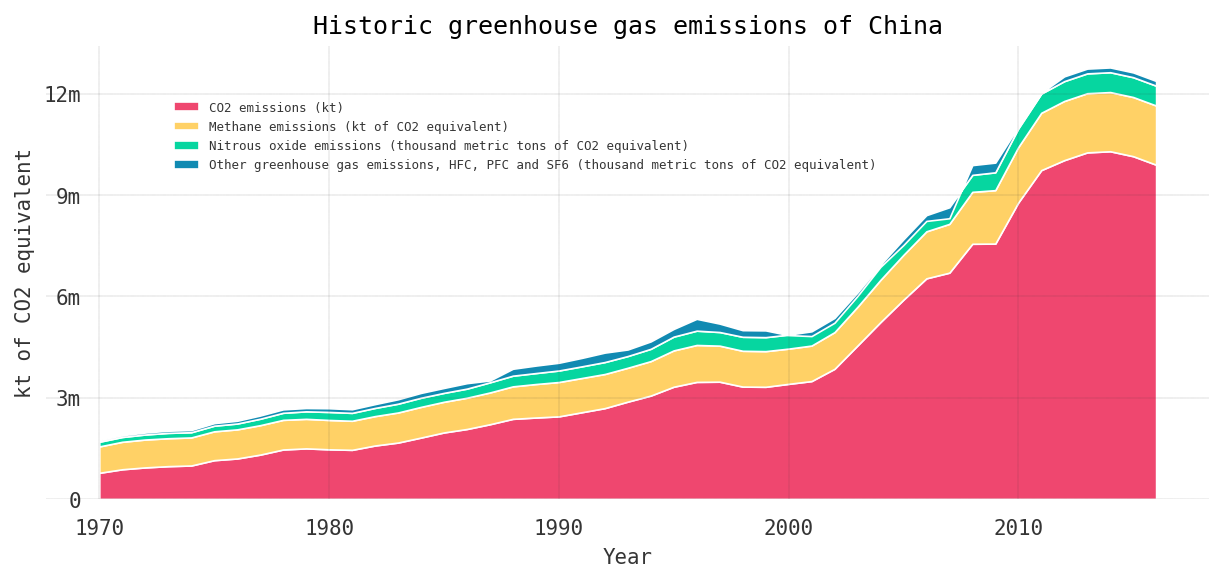

In [35]:
def y_update_ticklabel_ax(x,pos):
    result = x/1000000
    if x==0:
        return  '{}'.format(int(result))
    else:
        return '{}m'.format(int(result))

fig, ax = plt.subplots(1,1,figsize=(10,4),dpi=150)
ax.stackplot(df['Year'],
             df[environment_labels[0]],
             df[environment_labels[1]],
             df[environment_labels[2]],df[environment_labels[3]],
            labels = environment_labels[0:4],
            colors=color_mix,
            edgecolor='w',
            linewidth=0.8)
ax.yaxis.set_major_locator(plt.MaxNLocator(5))
ax.spines['left'].set_position(('outward',-20))
ax.spines['bottom'].set_position(('outward',6))
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis='both',length=0,labelcolor=label_color)
ax.grid(axis='both',color=label_color,linestyle='--',linewidth=0.1)
# ax.set_axisbelow(True)
ax.yaxis.set_major_formatter(FuncFormatter(y_update_ticklabel_ax))
ax.set_xlabel('Year')
ax.set_ylabel('kt of CO2 equivalent')
ax.set_title('Historic greenhouse gas emissions of China')

ax.legend(loc='center left', bbox_to_anchor=(0.1,0.8), ncol=1,frameon=False, fontsize=6,labelcolor=label_color)

plt.show()

💭 Not very surprising, leaps and bounds in development come in hand with great energy consumption, in which co2 ranks first, way ahead of the others.

#  Health

In [36]:
data = pd.read_csv('./BRICS Development Indicators/HealthAndPoverty_Data.csv',sep=';')
health_labels = ['Life expectancy at birth, total (years)',
                'Birth rate, crude (per 1,000 people)',
                'Death rate, crude (per 1,000 people)',
                'Fertility rate, total (births per woman)']
health = data[data['SeriesName'].isin(health_labels)]
health.loc[:,'Year'] = pd.to_datetime(health['Year'],format='%Y').dt.year
health = health.set_index(['Year','SeriesName','CountryName'])['Value'].unstack().unstack()
health.fillna(method='ffill',inplace=True)
health = health.stack().stack().reset_index().rename(columns={0:'Value'})
health = health.set_index(['Year','CountryName','SeriesName'])['Value'].unstack().reset_index()
health.head()

SeriesName,Year,CountryName,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)","Fertility rate, total (births per woman)","Life expectancy at birth, total (years)"
0,1970,Brazil,35.116,10.157,4.972,58.911000
1,1970,China,33.430,7.600,5.725,59.085000
2,1970,India,39.108,17.187,5.587,47.737000
3,1970,Russian Federation,14.672,8.850,1.990,68.133659
4,1970,South Africa,38.542,14.255,5.669,52.620000


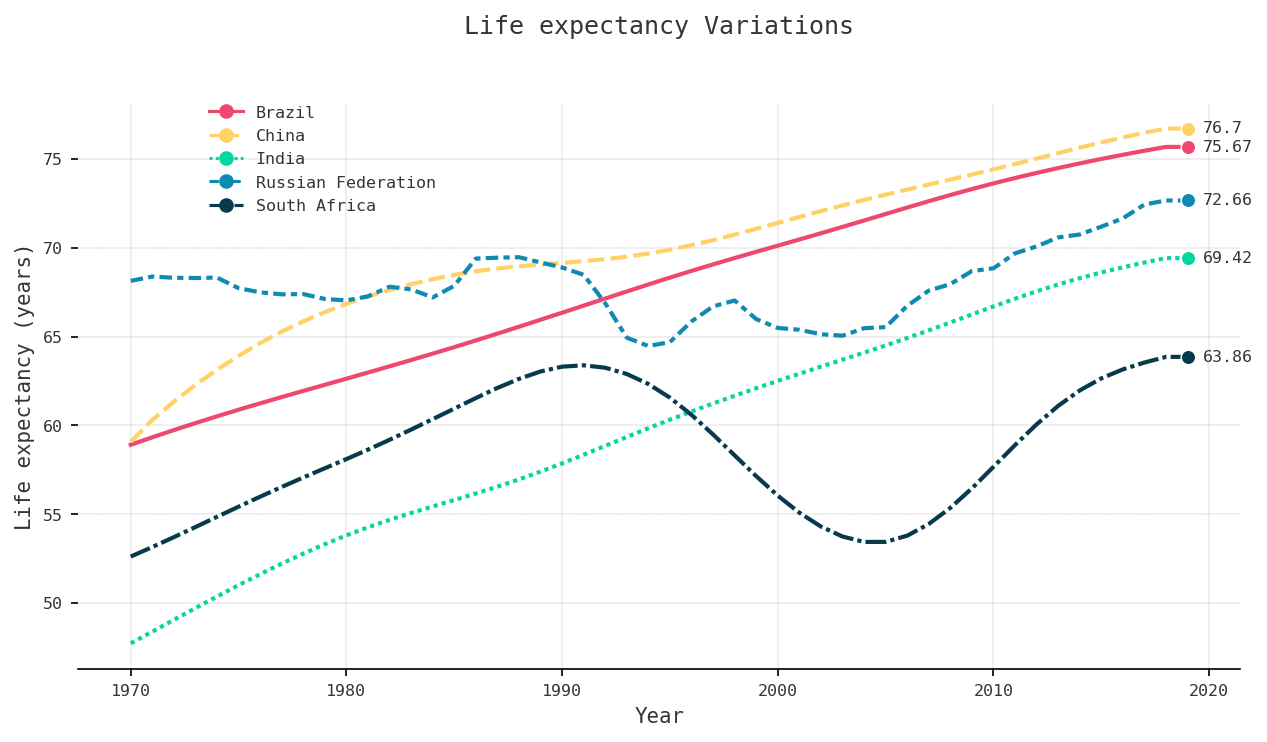

In [37]:
df =health
countries = df['CountryName'].unique()
fig, ax = plt.subplots(1,1,figsize=(10,5),dpi=150)

sns.lineplot(x='Year',
             y='Life expectancy at birth, total (years)',
             data=health,
             hue='CountryName',
             style='CountryName',
             ms=7,
             mec='w',
             lw=2,
             palette=color_mix,
             markers=['o']*5
            )
ax.legend(loc='center left', bbox_to_anchor=(0.1,0.9), ncol=1,frameon=False, fontsize=8,labelcolor=label_color)
ax.set_ylabel('Life expectancy (years)')
for i in range(5):
    ax.lines[i].set_markevery(every=[-1])
    
for i in range(5):
    ax.text(df['Year'].iloc[-1]+0.7,
            df[df['CountryName']==countries[i]]['Life expectancy at birth, total (years)'].iloc[-1],
            round(df[df['CountryName']==countries[i]]['Life expectancy at birth, total (years)'].iloc[-1],2),
            va='center',
           color=label_color,
           fontsize=8)
ax.grid(axis='both',color=label_color,linestyle='--',linewidth=0.1)
ax.tick_params(axis='both',which='major',labelcolor=label_color,labelsize=8)
ax.set_title('Life expectancy Variations',c=label_color,y=1.1)
plt.show()

💭 Not very surprising again, life expectancies are growing as a whole, but I wonder why South Africa is a little different from the other?

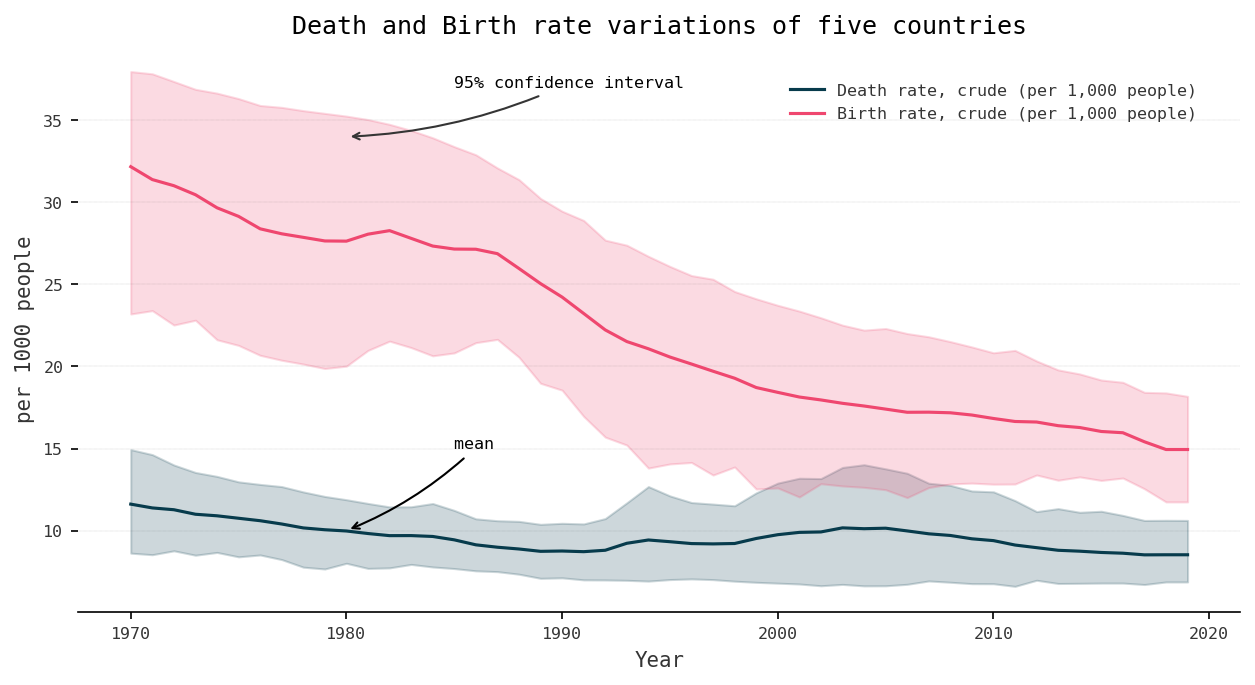

In [38]:
df = health
fig, ax = plt.subplots(1,1,figsize=(10,5),dpi=150)

sns.lineplot(x='Year',y='Death rate, crude (per 1,000 people)',data=df,color='#073b4c')
sns.lineplot(x='Year',y='Birth rate, crude (per 1,000 people)',data=df,color='#ef476f')
ax.legend(['Death rate, crude (per 1,000 people)','Birth rate, crude (per 1,000 people)'],loc='center left', bbox_to_anchor=(0.6,0.9), ncol=1,frameon=False, fontsize=8,labelcolor=label_color)

ax.annotate('95% confidence interval',xy=(1980,34),xytext=(1985,37),arrowprops=dict(color=label_color,arrowstyle='->',connectionstyle='arc3,rad=-0.1'),fontsize=8)
ax.annotate('mean ',xy=(1980,10),xytext=(1985,15),arrowprops=dict(facecolor=label_color,arrowstyle='->',connectionstyle='arc3,rad=-0.1'),fontsize=8)

ax.set_ylabel('per 1000 people')
ax.set_title('Death and Birth rate variations of five countries')
ax.grid(axis='y',color=label_color,linestyle=':',linewidth=0.1)
ax.tick_params(axis='both',which='major',labelcolor=label_color,labelsize=8)
plt.show()

💭 As a whole, birth rate is declining, perhaps aging population is inevitable?

#  Employment and Gender


In [39]:
data = pd.read_csv('./BRICS Development Indicators/PublicSector_Indicators.csv',sep=';')
public_labels=['Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate)',
              'Labor force, female (% of total labor force)',
              'Labor force, total']

public = data[data['SeriesName'].isin(public_labels)]
public.loc[:,'Year'] = pd.to_datetime(public['Year'],format='%Y').dt.year
public = public.set_index(['Year','CountryName','SeriesName'])['Value'].unstack().reset_index()
public['Labor force, female'] = public['Labor force, total']*public['Labor force, female (% of total labor force)']/100
public.tail(5)

SeriesName,Year,CountryName,"Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate)","Labor force, female (% of total labor force)","Labor force, total","Labor force, female"
245,2019,Brazil,54.208000,43.583764,106500838.0,46417074.0
246,2019,China,60.451000,43.710686,781074570.0,341413054.0
247,2019,India,20.524000,20.076267,494261426.0,99229243.0
248,2019,Russian Federation,54.821999,48.572704,73025684.0,35470549.0
249,2019,South Africa,49.610001,45.377809,23300226.0,10573132.0


In [40]:
health.tail(5)

SeriesName,Year,CountryName,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)","Fertility rate, total (births per woman)","Life expectancy at birth, total (years)"
245,2019,Brazil,13.924,6.452,1.730,75.672000
246,2019,China,10.900,7.100,1.690,76.704000
247,2019,India,17.857,7.234,2.222,69.416000
248,2019,Russian Federation,11.500,12.400,1.570,72.657317
249,2019,South Africa,20.510,9.435,2.405,63.857000


In [41]:
df = public[public['Year'].isin([2019,1990])].merge(health[health['Year'].isin([2019,1990])],on=['Year','CountryName'])
df.head()

SeriesName,Year,CountryName,"Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate)","Labor force, female (% of total labor force)","Labor force, total","Labor force, female","Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)","Fertility rate, total (births per woman)","Life expectancy at birth, total (years)"
0,1990,Brazil,41.674999,34.135253,59920078.0,20453870.0,24.844,6.948,2.902,66.343000
1,1990,China,73.240997,45.175899,641523356.0,289813944.0,21.060,6.670,2.309,69.145000
2,1990,India,30.278999,25.014711,316561107.0,79186845.0,31.517,10.864,4.045,57.865000
3,1990,Russian Federation,58.891998,48.146664,75907379.0,36546871.0,13.400,11.200,1.892,68.886098
4,1990,South Africa,41.407001,37.232274,12458299.0,4638508.0,30.312,8.082,3.964,63.307000


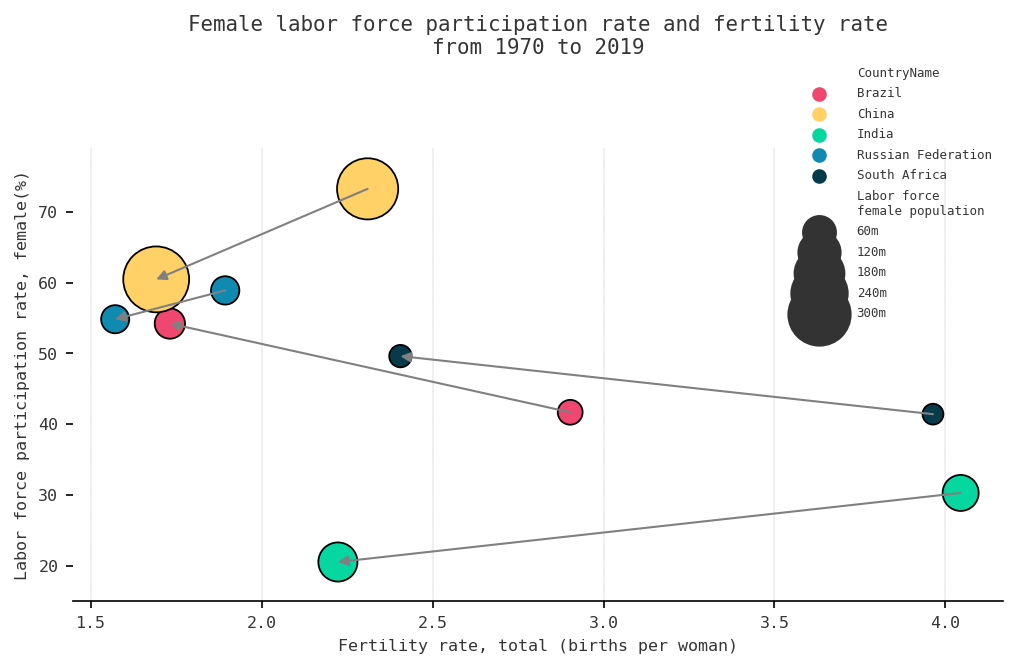

In [42]:
df = public[public['Year'].isin([2019,1990])].merge(health[health['Year'].isin([2019,1990])],on=['Year','CountryName'])
fig, ax = plt.subplots(1,1,figsize=(8,4),dpi=150)

sns.scatterplot(x='Fertility rate, total (births per woman)',
               y='Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate)',
               size='Labor force, female',
               data=df,
               sizes=(100,1000),
                hue='CountryName',
               legend=True,
               palette=color_mix,
               edgecolor='k')

for i in range(5):
    ax.annotate('',xy=(df.iloc[i+5,8],df.iloc[i+5,2]),xytext=(df.iloc[i,8],df.iloc[i,2]),arrowprops=dict(shrinkA=0,shrinkB=0,color='grey',arrowstyle='-|>',connectionstyle='arc3,rad=0'))
    
l = ax.legend(loc='center right', bbox_to_anchor=(1,0.9), ncol=1,frameon=False, fontsize=6,labelcolor=label_color,handletextpad=2,labelspacing=0.6)
l.get_texts()[6].set_text('Labor force\nfemale population')
for i in range(7,12):
    t = l.get_texts()[i].get_text()
    l.get_texts()[i].set_text('{}m'.format(round(float(t)*100)))
    
ax.grid(axis='x',color=label_color,linestyle='--',linewidth=0.1)
ax.tick_params(axis='both',which='major',labelcolor=label_color,labelsize=8)
ax.set_ylim(15,79)
ax.set_ylabel('Labor force participation rate, female(%)',fontsize=8)
ax.set_xlabel('Fertility rate, total (births per woman)',fontsize=8)
ax.set_title('Female labor force participation rate and fertility rate\nfrom 1970 to 2019',color=label_color,fontsize=10,y=1.18)
plt.show()

💭 One thing in common, fertility rates are all declining from 1970 to 2019, and it corresponds to the decrease of birth rate. I guess some analyses concerning about whether women are seeing fulfilling themselves in their careers more important than being housewives require some other background information.